# Sale Price of a House Prediction
The dataset consists of information about various houses and their price which is used to build Regressor model to predict the sale price of a house.

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.impute import SimpleImputer 

In [97]:
#Importin data
data = pd.read_csv('Sale Price of a house dataset.csv')

Original_data = pd.read_csv('Sale Price of a house dataset.csv')
Original_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14-May-17,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15-Feb-16,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14-Jun-17,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15-Jan-16,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [98]:
#Discriptive statistics of the dataset including categorical variables
Original_data.describe(include = 'all')

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,21613,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15-Apr-16,NaN,NaN,NaN,NaN,NaN,NaN,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,19489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


# Data Exploration -- Target Variable
1. In this dataset Target variable is 'Sale Price' of the house 
2. The target variable is of FLOAT data type, continous numerical variable
3. Mean = 540198.4357443658	
   Medain = 450000.0
   Standard Deviation = 367388.99446065293
   Maximum Value = 7700000.0
   Minimum Value = 75000.0

In [99]:
l1 = []
l2 = []
for i in range(21613) :
    l1.append(75000)
    l2.append(1129575)
l = list(zip(l1, l2))
d = pd.DataFrame(l, columns = ["LL", "UL"])
d.head(5)

,LL,UL
0,75000,1129575
1,75000,1129575
2,75000,1129575
3,75000,1129575
4,75000,1129575


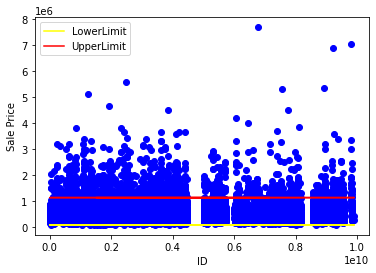

<AxesSubplot:xlabel='Sale Price'>

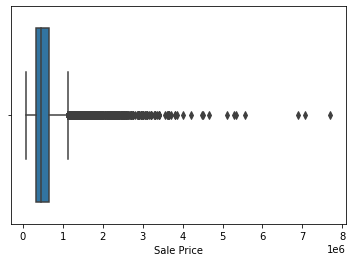

In [100]:
''' Checking for outliers in the Target Variable i.e., Sale Price Column of the dataset
    The ouliers can be observed by plotting the box plot or scatter plot for the Target Variable
    Q1(First Quartile) = 321950.0
    Q2(Second Quartile) = 450000.0 ; also called as median
    Q3(Third Quartile) = 645000.0
    Inter Quartile Range(IQR) = Q3 - Q1
    IQR = 323050
    Lower Limit(LL) = Q1 - 1.5*IQR
    Upper Limit(UL) = Q3 + 1.5*IQR
    LL = -162625
    Ul = 1129575
    Since LL < Minimum value, then LL=Minimum value
          UL < Maximum Value, then UL is unchanged
    LL = 75000
    UL = 1129575
    So any data point which is higher than Upper Limit(UL) or lower than Lower Limit can be termed as OUTLIER
'''
plt.scatter(x=Original_data['ID'], y=Original_data['Sale Price'], color = 'blue')
plt.plot(Original_data['ID'], d['LL'], color='yellow', label = 'LowerLimit')
plt.plot(Original_data['ID'], d['UL'], color='red', label='UpperLimit')
plt.xlabel("ID")
plt.ylabel("Sale Price")
plt.legend()
plt.show()
sea.boxplot(x=Original_data['Sale Price'])

1. From above two graphs we can clearly observe that outliers exist for the target variable. 
2. From the first graph, the points which lie above red line(UpperLimit) and points which lie below yellow line(LowerLimit) are    outliers.
3. From second graph, the point which are after third quartile are outliers.
4. The outliers have to be treated otherwise the model performance will be affected. Here we are treating the outliers by imputing method i.e., 
   a. if value>UpperLimit it will be replaced by the UpperLimit
   b. if value<LowerLimit it will be replaced by the LowerLimit

In [101]:
#Treating Outliers
LL = 75000
UL = 1129575

def limit_imputer(value) :
    if value>UL :
        return UL
    if value<LL :
        return LL
    else :
        return value
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

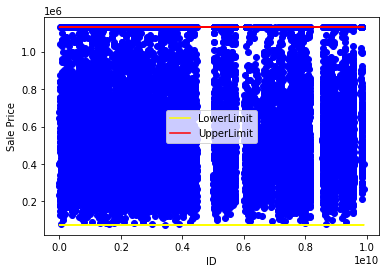

<AxesSubplot:xlabel='Sale Price'>

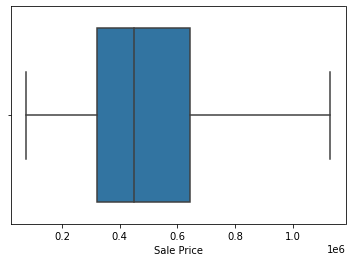

In [102]:
plt.scatter(x=data['ID'], y=data['Sale Price'], color = 'blue')
plt.plot(data['ID'], d['LL'], color='yellow', label = 'LowerLimit')
plt.plot(data['ID'], d['UL'], color='red', label='UpperLimit')
plt.xlabel("ID")
plt.ylabel("Sale Price")
plt.legend()
plt.show()
sea.boxplot(x=data['Sale Price'])

Here in these graphs we can see that outliers are treated(removed).

In [103]:
''' Treating the missing values --> Target Variables '''
#The number of missing values in the Target Variable
Original_data['Sale Price'].isnull().sum()

4

In [104]:
'''As the number of missing values is less we will remove the columns containing the missing columns it won't effect the
performance of the model that much'''

data.dropna(inplace = True, axis = 0, subset=['Sale Price'])
data['Sale Price'].isnull().sum()

0

This completes Exploratory data analysis of the Target Variable

# Data Exploration -- Independent Variables

In [105]:
Original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [106]:
#Treating missing values in Independent Numerical Variables

numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 
                     'Area of the House from Basement (in Sqft)', 'No of Floors', 'Basement Area (in Sqft)', 
                     'Age of House (in Years)', 'Latitude', 'Longitude', 
                     'Living Area after Renovation (in Sqft)', 'No of Bathrooms', 'Renovated Year',
                     'Lot Area after Renovation (in Sqft)']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [107]:
#Treating Missing values in Independent Categorical Variables

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

column = data['Zipcode'].values.reshape(-1,1)
data['Zipcode'] = imputer.fit_transform(column)
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# Variable Transformation

In [108]:
#data['No of Times Visited'] = Original_data['No of Times Visited']
Original_data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [109]:
'''Variable Transformation --> converting Zipcode into catogorical variable so it will be more meaningful'''

data['Zipcode'] = data['Zipcode'].astype(object)

'''Also converting No of Times Visited variable to numerical it has only terms like None, Once, Twice, Thrice so we
will replace them with corresponding numbers so they will have more meaning'''


data['No of Times Visited'] = data['No of Times Visited'].map({'None' : 0, 'Once' : 1, 'Twice': 2, 
                                                               'Thrice': 3, 'Four': 4})

data['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [110]:
'''Deriving 2 new variables Ever_Renovated and Year Since Renovation form Renovated Year variable since they also 
impact the Sale Price of the house'''

data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year
data['Year Since Renovation'] = np.where(data['Ever Renovated']=='yes', abs(data['Purchase Year']-data['Renovated Year']), 0)

In [111]:
data.drop(columns = ['Renovated Year', 'Date House was Sold'], inplace = True, axis = 1)

# Data Exploration Independent Categorical Variables

Categorical variables are:
1. Waterfront View
2. Condition of the House
3. Zipcode
4. Ever Renovated

In [112]:
data = data.rename(columns = {'Sale Price' : 'Sale_Price', 'Condition of the House' : 'Condition_of_the_House',
                               'Ever Renovated' : 'Ever_Renovated', 'Waterfront View' : 'Waterfront_View'})

In [113]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
mod = smf.ols('Sale_Price ~ Condition_of_the_House', data=data).fit()
Anova_Table = sm.stats.anova_lm(mod, type = 2)
print(Anova_Table)

                             df        sum_sq       mean_sq         F  \
Condition_of_the_House      4.0  1.441831e+13  3.604579e+12  58.25563   
Residual                21604.0  1.336752e+15  6.187520e+10       NaN   

                              PR(>F)  
Condition_of_the_House  5.447605e-49  
Residual                         NaN  


In [114]:
mod = smf.ols('Sale_Price ~ Ever_Renovated', data=data).fit()
Anova_Table = sm.stats.anova_lm(mod, type = 2)
print(Anova_Table)

                     df        sum_sq       mean_sq           F        PR(>F)
Ever_Renovated      1.0  1.998463e+13  1.998463e+13  324.378469  5.419055e-72
Residual        21607.0  1.331185e+15  6.160899e+10         NaN           NaN


In [115]:
mod = smf.ols('Sale_Price ~ Waterfront_View', data=data).fit()
Anova_Table = sm.stats.anova_lm(mod, type = 2)
print(Anova_Table)

                      df        sum_sq       mean_sq           F  \
Waterfront_View      1.0  3.283737e+13  3.283737e+13  538.192683   
Residual         21607.0  1.318333e+15  6.101415e+10         NaN   

                        PR(>F)  
Waterfront_View  1.275558e-117  
Residual                   NaN  


In [116]:
mod = smf.ols('Sale_Price ~ Zipcode', data=data).fit()
Anova_Table = sm.stats.anova_lm(mod, type = 2)
print(Anova_Table)

               df        sum_sq       mean_sq           F  PR(>F)
Zipcode      69.0  6.859657e+14  9.941532e+12  321.902033     0.0
Residual  21539.0  6.652044e+14  3.088372e+10         NaN     NaN


The 3 categorical variables have PR values less than 0.05, that implies they will have impact on the target variable and 
must be included in our model

# Binning and Creating Dummy Variables

In [117]:
data = pd.get_dummies(data, columns = ['Condition_of_the_House', 'Waterfront_View', 'Ever_Renovated'], drop_first = True)
data

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650.0,2017,0.0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639.0,2017,0.0,0,1,0,0,0,1
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062.0,2016,0.0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000.0,2017,0.0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503.0,2016,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,1530.0,1509.0,2017,0.0,0,1,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,1830.0,7200.0,2016,0.0,0,1,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,1020.0,2007.0,2017,0.0,0,1,0,0,0,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,1410.0,1287.0,2016,0.0,0,1,0,0,0,0


In [118]:
zip_Table = data.groupby('Zipcode').agg({'Sale_Price' : 'mean'}).sort_values('Sale_Price', ascending = True)
zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [119]:
zip_Table['Zipcode_Group'] = pd.cut(zip_Table['Sale_Price'], bins = 10, labels = ['Zipcode_Group_0',
                                                                                 'Zipcode_Group_1',
                                                                                 'Zipcode_Group_2',
                                                                                 'Zipcode_Group_3',
                                                                                 'Zipcode_Group_4',
                                                                                 'Zipcode_Group_5',
                                                                                 'Zipcode_Group_6',
                                                                                 'Zipcode_Group_7',
                                                                                 'Zipcode_Group_8',
                                                                                 'Zipcode_Group_9'], include_lowest = True)

In [120]:
data = pd.merge(data, zip_Table['Zipcode_Group'], left_on = 'Zipcode', how = 'left', right_index = True)
data

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Lot Area after Renovation (in Sqft),Purchase Year,Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,5650.0,2017,0.0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,7639.0,2017,0.0,0,1,0,0,0,1,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,8062.0,2016,0.0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,5000.0,2017,0.0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,7503.0,2016,0.0,0,1,0,0,0,0,Zipcode_Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,1509.0,2017,0.0,0,1,0,0,0,0,Zipcode_Group_3
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,7200.0,2016,0.0,0,1,0,0,0,0,Zipcode_Group_1
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,2007.0,2017,0.0,0,1,0,0,0,0,Zipcode_Group_3
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,1287.0,2016,0.0,0,1,0,0,0,0,Zipcode_Group_4


In [121]:
data = pd.get_dummies(data, columns = ['Zipcode_Group'], drop_first = True)
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


# Treating MultiCollinearity
Removing the one of the variable from the set of two variables which have high collinearity between them

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']     #Target Variable
X = scaler.fit_transform(data.drop(columns = ['Sale_Price', 'ID']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price', 'ID']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [123]:
k = X.corr()
z = [[str(i), str(j)]for i in k.columns
    for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

z will have all possible pairs which have correlation greated than 0.5 but every pair appears for 2 times 
so there are only 15 pairs which have correlation greater than 0.5 and one of the variable from these pairs
have to be removed.

In [124]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.643622
No of Bathrooms                                 3.370935
Flat Area (in Sqft)                          1481.791318
Lot Area (in Sqft)                              2.107971
No of Floors                                    2.142743
No of Times Visited                             1.445185
Overall Grade                                   2.962431
Area of the House from Basement (in Sqft)    1205.652642
Basement Area (in Sqft)                       345.506859
Age of House (in Years)                         2.699312
Zipcode                                         1.836820
Latitude                                        2.541861
Longitude                                       2.029553
Living Area after Renovation (in Sqft)          3.076003
Lot Area after Renovation (in Sqft)             2.144344
Purchase Year                                   1.006610
Year Since Renovation                                NaN
Condition_of_the_House_Excellen

In [125]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [126]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [127]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,1.870094,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,0.879534,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,-0.933379,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,1.085122,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,-0.073647,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [128]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.643119
 No of Bathrooms                              3.369770
 Lot Area (in Sqft)                           2.107392
 No of Floors                                 2.142640
 No of Times Visited                          1.445150
 Overall Grade                                2.952007
 Area of the House from Basement (in Sqft)    4.579806
 Basement Area (in Sqft)                      1.979426
 Age of House (in Years)                      2.695965
 Zipcode                                      1.836558
 Latitude                                     2.541810
 Longitude                                    2.029427
 Living Area after Renovation (in Sqft)       3.071897
 Lot Area after Renovation (in Sqft)          2.144065
 Purchase Year                                1.006572
 Year Since Renovation                             NaN
 Condition_of_the_House_Excellent             1.210788
 Condition_of_the_House_Good                  1.268652
 Condition

# Splitting the dataset into Test and Train sets

In [129]:
data.to_csv('New_Data', sep = '\t')

In [130]:
X = vif_data
Y = data['Sale_Price']

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

# Building a Linear Regression Model (Regressor)

In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
accuracy = lr.score(x_test, y_test)
print("Accuracy of a LinearRegression Model : ", accuracy)

Accuracy of a LinearRegression Model :  0.8471959084944231
